In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,8)
pd.options.mode.chained_assignment = None

In [2]:
df=pd.read_csv('netflix_data.csv')

In [3]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [4]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [5]:
df.shape

(7787, 12)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Find the Duplicates value

In [9]:
df.duplicated().sum()

0

In [10]:
df1=df[df.duplicated()]
df1

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

### FInd Null Values

In [11]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

show_id-0%
type-0%
title-0%
director-31%
cast-9%
country-7%
date_added-0%
release_year-0%
rating-0%
duration-0%
listed_in-0%
description-0%


In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

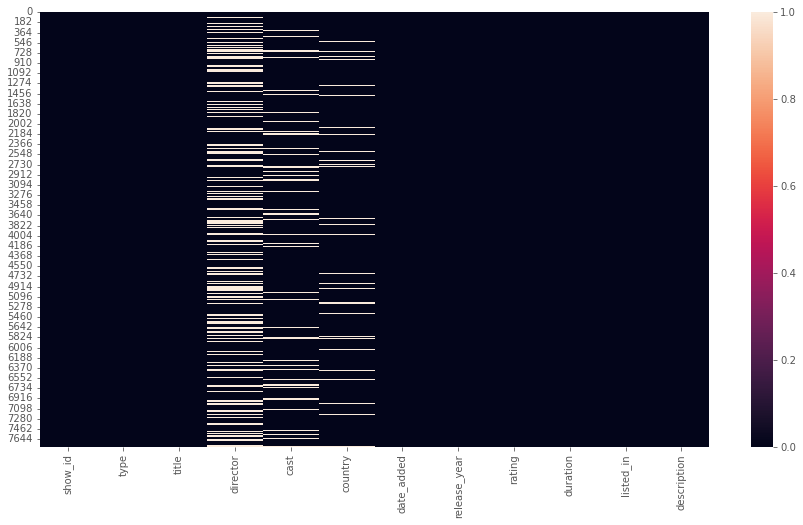

In [13]:
sns.heatmap(df.isnull())

### Remove Null Values / Data wrangling

In [14]:
df.drop(['cast'], axis=1, inplace=True)

In [15]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
df['date_added']=df['date_added'].fillna('January 1, {}'.format(str(df['release_year'].mode()[0])))

In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
country          507
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [18]:
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [19]:
df.fillna({
    'country':'United States',
    'rating':'TV-MA',
    'director':'no director',
    'cast': 'no cast'
}, inplace=True)

In [20]:
df.isnull().sum().sum()

0

## Visualization

In [21]:
df.head()

show_id     type  title           director        country  \
0      s1  TV Show     3%        no director         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Singapore   
3      s4    Movie      9        Shane Acker  United States   
4      s5    Movie     21     Robert Luketic  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [22]:
a1=df[(df['release_year']>2000)]
a2=a1.value_counts

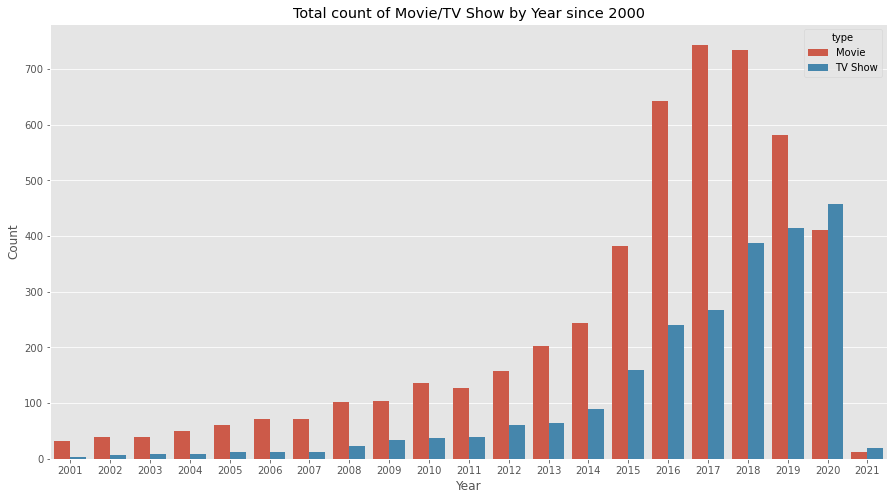

In [23]:
release_year = df.groupby(['release_year','type']).show_id.count()
release_year = pd.DataFrame(release_year)
release_year = release_year.reset_index()
latest = release_year[release_year.release_year>2000]


sns.barplot(x='release_year',y='show_id',hue='type',data=latest)
plt.title('Total count of Movie/TV Show by Year since 2000')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

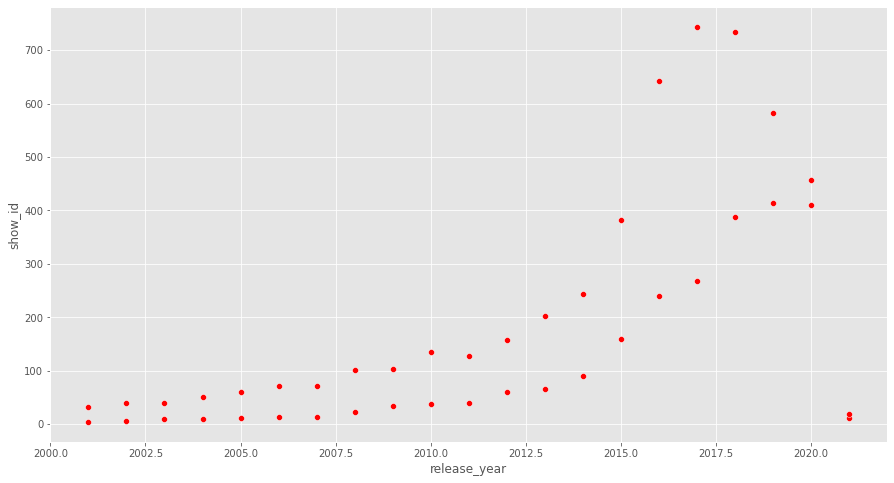

In [24]:
sns.scatterplot(x='release_year',y='show_id',data=latest ,color='red')
plt.show()

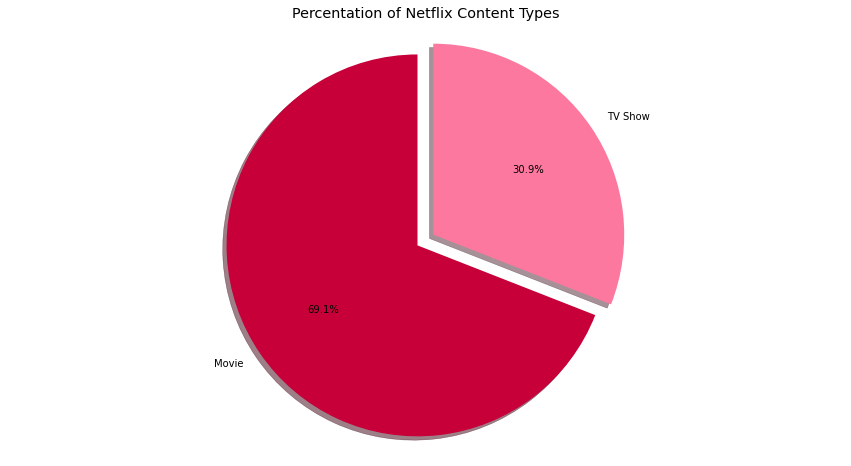

In [25]:
plt.pie(df['type'].value_counts(),explode=(0.05,0.05), labels=df['type'].value_counts().index, colors=['#C70039','#FD789F'],autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Percentation of Netflix Content Types")
plt.axis('equal')
plt.show()

In [26]:
cat=df['listed_in'].value_counts()[:10]

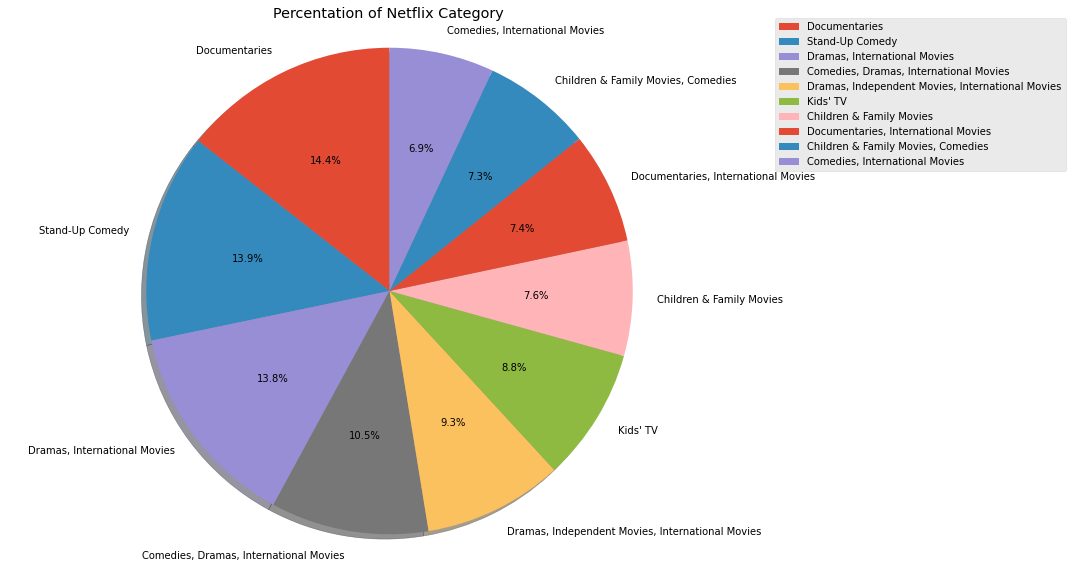

In [27]:
plt.pie(df['listed_in'].value_counts()[:10], labels=df['listed_in'].value_counts()[:10].index,autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Percentation of Netflix Category")
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [28]:
df.groupby(['country'])['type'].value_counts().sort_values(ascending=False)[:10].to_frame()

type
country        type         
United States  Movie    2080
               TV Show   982
India          Movie     852
United Kingdom TV Show   204
               Movie     193
Japan          TV Show   157
South Korea    TV Show   147
Canada         Movie     118
Spain          Movie      89
Egypt          Movie      89

In [29]:
cou_list=['United States', 'India','Japan', 'South Korea', 'Canada']

In [30]:
top_coun=df[df['country'].isin(cou_list)]

In [31]:
top_coun.groupby(['country','type']).show_id.count().to_frame()

show_id
country       type            
Canada        Movie        118
              TV Show       59
India         Movie        852
              TV Show       71
Japan         Movie         69
              TV Show      157
South Korea   Movie         36
              TV Show      147
United States Movie       2080
              TV Show      982

In [32]:
top_coun['country'].value_counts()

United States    3062
India             923
Japan             226
South Korea       183
Canada            177
Name: country, dtype: int64

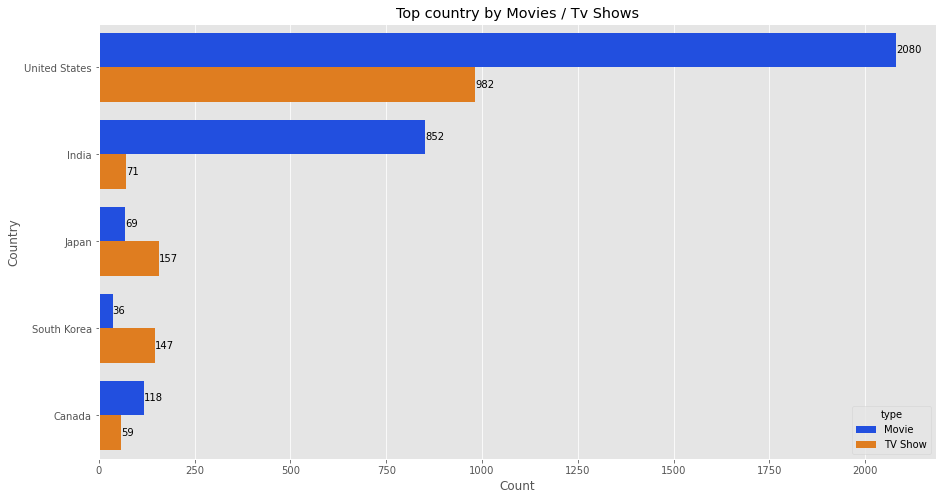

In [33]:
country = top_coun.groupby(['country','type']).show_id.count().sort_values(ascending=False)
country = pd.DataFrame(country)
country = country.reset_index()
latest = country

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='show_id',y='country',hue='type',data=latest, palette=('bright'))
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top country by Movies / Tv Shows')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [34]:
df.head()

show_id     type  title           director        country  \
0      s1  TV Show     3%        no director         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Singapore   
3      s4    Movie      9        Shane Acker  United States   
4      s5    Movie     21     Robert Luketic  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

Text(0.35, 0.5, 'Text')

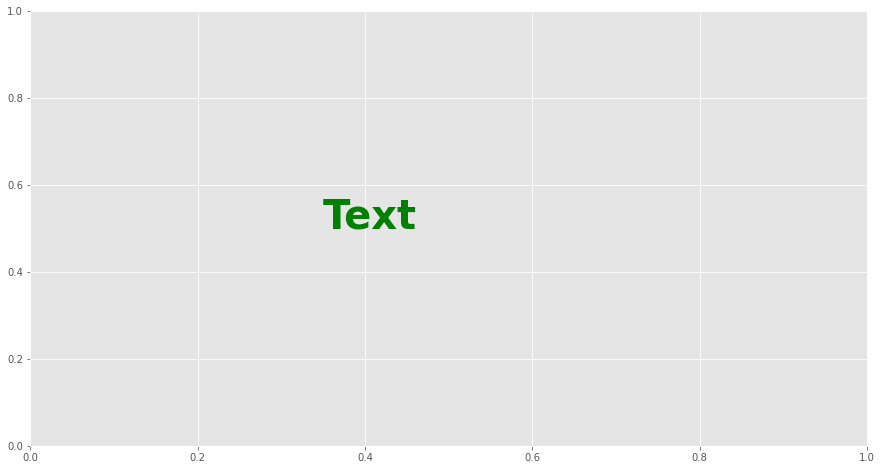

In [35]:
plt.text(0.35, 0.5, "Text",{'color':'green','weight':'heavy','size':40})

In [36]:
df.head()

show_id     type  title           director        country  \
0      s1  TV Show     3%        no director         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Singapore   
3      s4    Movie      9        Shane Acker  United States   
4      s5    Movie     21     Robert Luketic  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [37]:
df['country_sp']=df['country'].str.split(', ',expand=True)[0]

In [38]:
df.head(15)

show_id     type  title              director                country  \
0       s1  TV Show     3%           no director                 Brazil   
1       s2    Movie   7:19     Jorge Michel Grau                 Mexico   
2       s3    Movie  23:59          Gilbert Chan              Singapore   
3       s4    Movie      9           Shane Acker          United States   
4       s5    Movie     21        Robert Luketic          United States   
5       s6  TV Show     46           Serdar Akar                 Turkey   
6       s7    Movie    122       Yasir Al Yasiri                  Egypt   
7       s8    Movie    187        Kevin Reynolds          United States   
8       s9    Movie    706         Shravan Kumar                  India   
9      s10    Movie   1920          Vikram Bhatt                  India   
10     s11    Movie   1922          Zak Hilditch          United States   
11     s12  TV Show   1983           no director  Poland, United States   
12     s13  TV Show   1994  Diego Enrique Osorno                 Mexico   
13     s14    Movie  2,215   Nottapon Boonprakob               Thailand   
14     s15    Movie   3022            John Suits          United States   

           date_added  release_year rating   duration  \
0     August 14, 2020          2020  TV-MA  4 Seasons   
1   December 23, 2016          2016  TV-MA     93 min   
2   December 20, 2018          2011      R     78 min   
3   November 16, 2017          2009  PG-13     80 min   
4     January 1, 2020          2008  PG-13    123 min   
5        July 1, 2017          2016  TV-MA   1 Season   
6        June 1, 2020          2019  TV-MA     95 min   
7    November 1, 2019          1997      R    119 min   
8       April 1, 2019          2019  TV-14    118 min   
9   December 15, 2017          2008  TV-MA    143 min   
10   October 20, 2017          2017  TV-MA    103 min   
11  November 30, 2018          2018  TV-MA   1 Season   
12       May 17, 2019          2019  TV-MA   1 Season   
13      March 1, 2019          2018  TV-MA     89 min   
14     March 19, 2020          2019      R     91 min   

                                            listed_in  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
1                        Dramas, International Movies   
2                 Horror Movies, International Movies   
3   Action & Adventure, Independent Movies, Sci-Fi...   
4                                              Dramas   
5     International TV Shows, TV Dramas, TV Mysteries   
6                 Horror Movies, International Movies   
7                                              Dramas   
8                 Horror Movies, International Movies   
9      Horror Movies, International Movies, Thrillers   
10                                  Dramas, Thrillers   
11  Crime TV Shows, International TV Shows, TV Dramas   
12  Crime TV Shows, Docuseries, International TV S...   
13  Documentaries, International Movies, Sports Mo...   
14    Independent Movies, Sci-Fi & Fantasy, Thrillers   

                                          description     country_sp  
0   In a future where the elite inhabit an island ...         Brazil  
1   After a devastating earthquake hits Mexico Cit...         Mexico  
2   When an army recruit is found dead, his fellow...      Singapore  
3   In a postapocalyptic world, rag-doll robots hi...  United States  
4   A brilliant group of students become card-coun...  United States  
5   A genetics professor experiments with a treatm...         Turkey  
6   After an awful accident, a couple admitted to ...          Egypt  
7   After one of his high school students attacks ...  United States  
8   When a doctor goes missing, his psychiatrist w...          India  
9   An architect and his wife move into a castle t...          India  
10  A farmer pens a confession admitting to his wi...  United States  
11  In this dark alt-history thriller, a naïve law...         Poland  
12  Archival video and new interviews examine Mexi...

In [39]:
df.head()

show_id     type  title           director        country  \
0      s1  TV Show     3%        no director         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Singapore   
3      s4    Movie      9        Shane Acker  United States   
4      s5    Movie     21     Robert Luketic  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description     country_sp  
0  In a future where the elite inhabit an island ...         Brazil  
1  After a devastating earthquake hits Mexico Cit...         Mexico  
2  When an army recruit is found dead, his fellow...      Singapore  
3  In a postapocalyptic world, rag-doll robots hi...  United States  
4  A brilliant group of students become card-coun...  United States

In [40]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [41]:
country = df['country_sp']

iplot([go.Choropleth(
    locationmode='country names',
    locations=country,
    z=country.value_counts()
)])

In [42]:
df_movie=df[df['type'].isin(['Movie'])]
df_show =df[df['type'].isin(['TV Show'])]

In [43]:
df_movie.shape

(5377, 12)

In [44]:
df_show.shape

(2410, 12)

In [45]:
movie_list = df_movie.groupby(['listed_in']).show_id.count().sort_values(ascending=False)[:5]
movie_list = pd.DataFrame(movie_list)
movie_list = movie_list.reset_index()
movie_list 

listed_in  show_id
0                                     Documentaries      334
1                                   Stand-Up Comedy      321
2                      Dramas, International Movies      320
3            Comedies, Dramas, International Movies      243
4  Dramas, Independent Movies, International Movies      215

In [46]:
show_list = df_show.groupby(['listed_in']).show_id.count().sort_values(ascending=False)[:5]
show_list = pd.DataFrame(show_list)
show_list = show_list.reset_index()
show_list 

listed_in  show_id
0                                           Kids' TV      205
1                  International TV Shows, TV Dramas      111
2  Crime TV Shows, International TV Shows, TV Dramas      106
3                              Kids' TV, TV Comedies       90
4  International TV Shows, Romantic TV Shows, TV ...       86

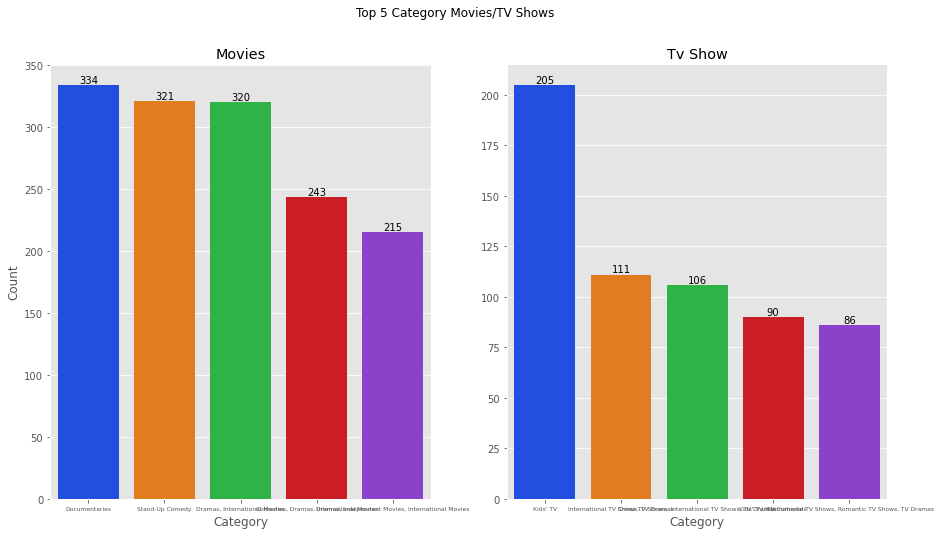

In [47]:
fig=plt.figure()
plt.suptitle('Top 5 Category Movies/TV Shows')
plt.rc('xtick', labelsize=6)

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

sns.barplot(x='listed_in',y='show_id',data=movie_list,palette=('bright'), ax=ax0)
for container in ax0.containers:
    ax0.bar_label(container)
ax0.set_title('Movies')
ax0.set_xlabel('Category')
ax0.set_ylabel('Count')

sns.barplot(x='listed_in',y='show_id',data=show_list,palette=('bright'), ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Tv Show')
ax1.set_xlabel('Category')
ax1.set_ylabel(None)


plt.show()

In [48]:
movie_run = df_movie.groupby(['duration']).show_id.count().sort_values(ascending=False)[:10]
movie_run = pd.DataFrame(movie_run)
movie_run = movie_run.reset_index()
movie_run.head()

duration  show_id
0   90 min      136
1   93 min      131
2   91 min      125
3   94 min      125
4   95 min      119

In [49]:
show_run = df_show.groupby(['duration']).show_id.count().sort_values(ascending=False)[:10]
show_run = pd.DataFrame(show_run)
show_run = show_run.reset_index()
show_run.head()

duration  show_id
0   1 Season     1608
1  2 Seasons      382
2  3 Seasons      184
3  4 Seasons       87
4  5 Seasons       58

<AxesSubplot:xlabel='duration', ylabel='show_id'>

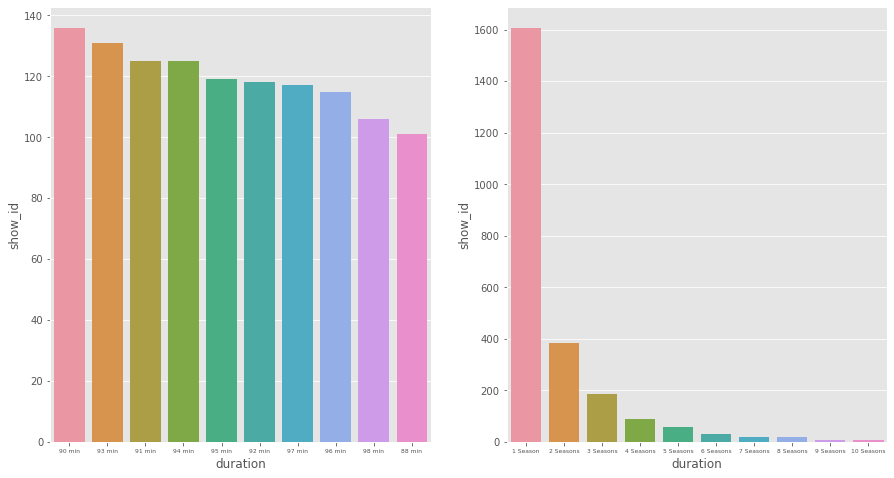

In [50]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#subplot 1
sns.barplot(data=movie_run, x='duration', y='show_id', ax=ax0)

#subplot 2
sns.barplot(data=show_run, x='duration', y='show_id', ax=ax1)


In [51]:
movie_director = df_movie.groupby(['director']).show_id.count().sort_values(ascending=False)[1:6]
movie_director = pd.DataFrame(movie_director)
movie_director = movie_director.reset_index()
movie_director.head()

director  show_id
0  Raúl Campos, Jan Suter       18
1            Marcus Raboy       15
2               Jay Karas       14
3     Cathy Garcia-Molina       13
4         Youssef Chahine       12

In [52]:
show_director = df_show.groupby(['director']).show_id.count().sort_values(ascending=False)[1:6]
show_director = pd.DataFrame(show_director)
show_director = show_director.reset_index()
show_director.head()

director  show_id
0  Alastair Fothergill        3
1          Stan Lathan        2
2            Ken Burns        2
3       Iginio Straffi        2
4          Shin Won-ho        2

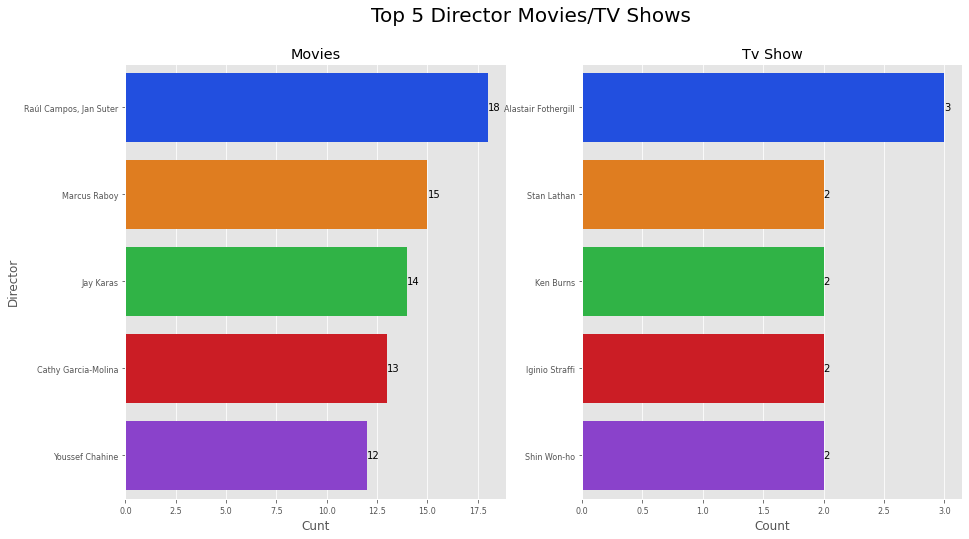

In [53]:
fig=plt.figure()
plt.suptitle('Top 5 Director Movies/TV Shows', fontsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

sns.barplot(x='show_id',y='director',data=movie_director,palette=('bright'), ax=ax0)
for container in ax0.containers:
    ax0.bar_label(container)
ax0.set_title('Movies')
ax0.set_xlabel('Cunt')
ax0.set_ylabel('Director')

sns.barplot(x='show_id',y='director',data=show_director,palette=('bright'), ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Tv Show')
ax1.set_xlabel('Count')
ax1.set_ylabel(None)


plt.show()

In [54]:
movie_rating = df_movie.groupby(['rating']).show_id.count().sort_values(ascending=False)[1:6]
movie_rating = pd.DataFrame(movie_rating)
movie_rating = movie_rating.reset_index()
movie_rating.head()

rating  show_id
0  TV-14     1272
1      R      663
2  TV-PG      505
3  PG-13      386
4     PG      247

In [55]:
show_rating = df_show.groupby(['rating']).show_id.count().sort_values(ascending=False)[1:6]
show_rating = pd.DataFrame(show_rating)
show_rating = show_rating.reset_index()
show_rating.head()

rating  show_id
0  TV-14      659
1  TV-PG      301
2  TV-Y7      176
3   TV-Y      163
4   TV-G       83

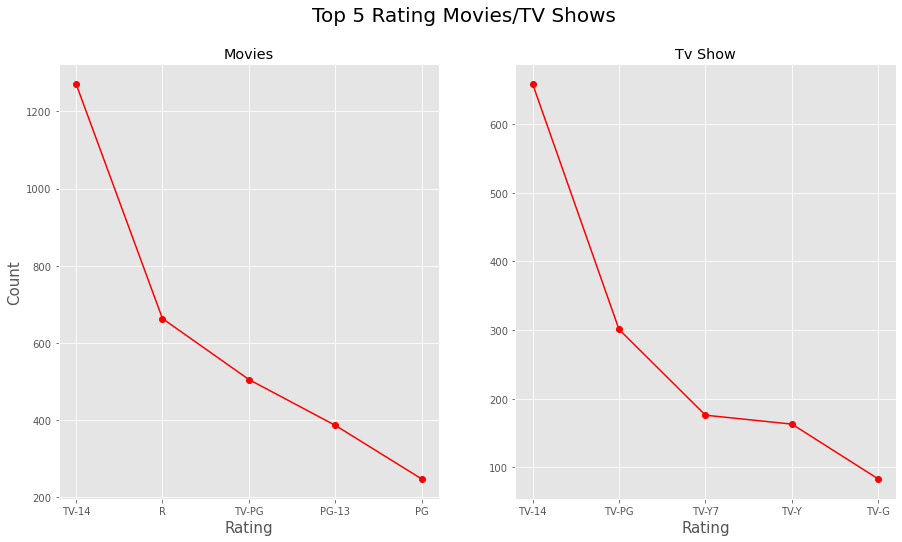

In [56]:
plt.figure()
plt.suptitle('Top 5 Rating Movies/TV Shows', fontsize=20)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=15)


plt.subplot(121)
plt.plot(movie_rating['rating'], movie_rating['show_id'],
              color='red', marker="o")
plt.title('Movies')
plt.xlabel('Rating')
plt.ylabel('Count')


plt.subplot(122)
plt.plot(show_rating['rating'], show_rating['show_id'],
              color='red', marker="o")
plt.title('Tv Show')
plt.xlabel('Rating')
plt.ylabel(None)


plt.show()

Text(0.5, 1.0, 'Year and Rating')

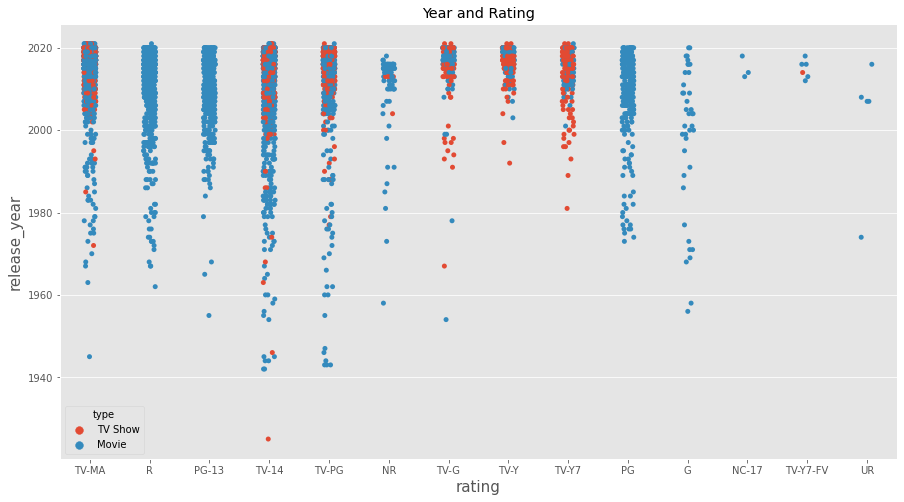

In [57]:
sns.stripplot(data=df, x='rating', y='release_year', hue='type')
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
plt.title('Year and Rating')

Text(0.5, 1.0, 'Year and Rating')

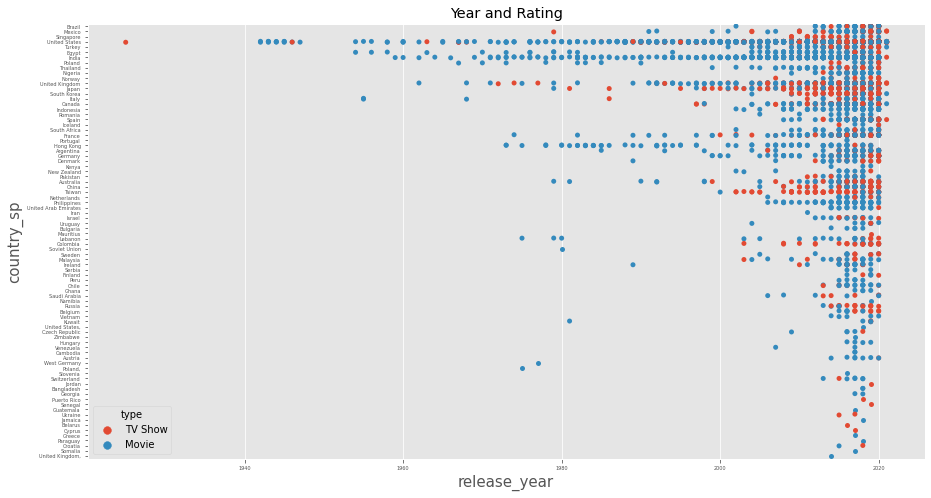

In [58]:
sns.stripplot(data=df, hue='type', x='release_year', y='country_sp')
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
plt.title('Year and Rating')

<AxesSubplot:xlabel='duration', ylabel='show_id'>

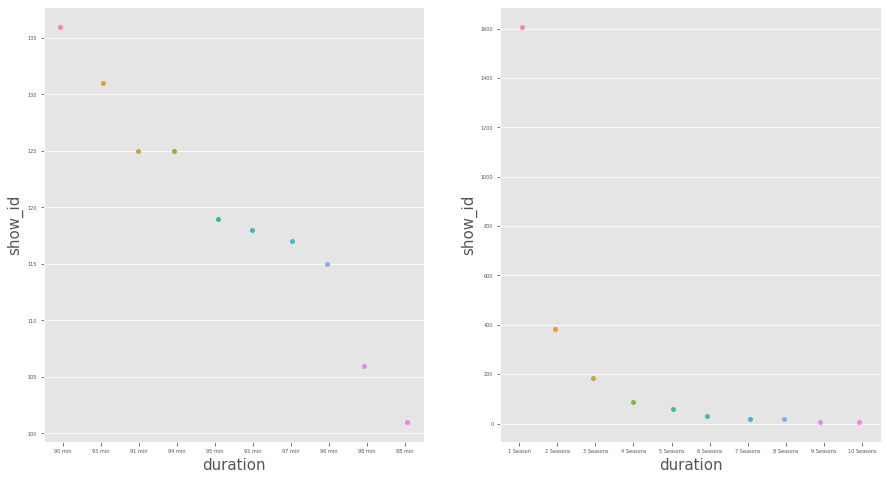

In [59]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#subplot 1
sns.stripplot(data=movie_run, x='duration', y='show_id', ax=ax0)

#subplot 2
sns.stripplot(data=show_run, x='duration', y='show_id', ax=ax1)

In [60]:
import pywedge as pw

In [61]:
mc=pw.Pywedge_Charts(df, c=None, y='release_year')

C:\Users\DELL\anaconda3\lib\site-packages\pywedge\pywedge.py:27: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [62]:
charts=mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [63]:
from wordcloud import WordCloud, ImageColorGenerator

<Figure size 720x432 with 0 Axes>

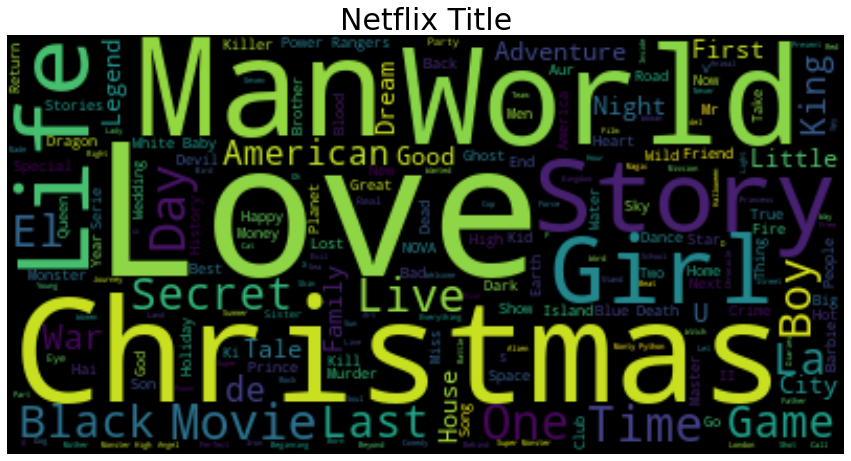

In [64]:
text = " ".join(str(each) for each in df['title'])

wordcloud = WordCloud(max_words=200, background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))

plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Netflix Title',fontsize = 30)
plt.axis("off")
plt.show()